In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
#from autils import *
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

2025-03-23 21:16:29.996944: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-23 21:16:30.361410: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-23 21:16:31.184334: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Handwritten Digit Recognition

In this notebook, I am going to explore a neural network to recognize two handwritten digits, zero and one.

In [2]:
def load_data():
    X = np.load("data/X.npy")
    y = np.load("data/y.npy")
    X = X[0:1000]
    y = y[0:1000]
    return X, y

In [3]:
X, y = load_data()

In [4]:
print(X.shape)
print(y.shape)

(1000, 400)
(1000, 1)


# Escribir aqui la descripcion de los datos. (PENDIENTE)

Exploring the data

In [5]:
print("The first element of X is: ", X[0])

The first element of X is:  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+

In [6]:
print("The first element of y is: ", y[0,0])
print("The last element of y is: ", y[-1,0])

The first element of y is:  0
The last element of y is:  1


Exploring the shape of the data:

In [7]:
print("The shape of X is: " + str(X.shape))
print("The shape of y is: " + str(y.shape))

The shape of X is: (1000, 400)
The shape of y is: (1000, 1)


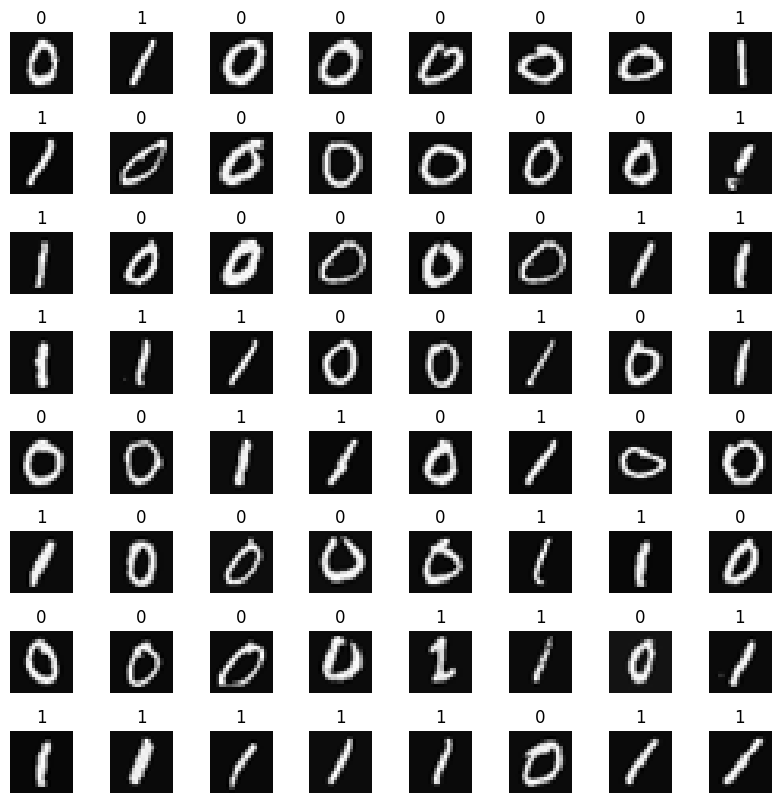

In [8]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) #Explain what this does

m, n = X.shape

fig, axes = plt.subplots(8,8,figsize=(8,8))
fig.tight_layout(pad=0.1) # Explain this

for i,ax in enumerate(axes.flat): # Why sometimes is used range() and here enumerate? What is the difference? When I should use one instead the other one?
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray') # Explain imshow

    #Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()

# Model representation

This model has 3 dense layers with sigmoid activations.

The shaper for `W` and `b` are:

- layer 1: `W1` is (400,25), `b1` is (25,)
- layer 2: `W2` is (25,15), `b2` is (15,)
- layer 3: `W3` is (15,1), `b3` is (1,)

A `Sequential` model is appropiate for **a plain of layers** where each layer has **exactly one input tensor and one output tensor**

In [9]:
model = Sequential (
    [
        tf.keras.Input((400,)),
        Dense(25, activation='sigmoid', name='layer1'),
        Dense(15, activation='sigmoid', name='layer2'),
        Dense(1, activation='sigmoid', name='layer3')
    ], name= "my_model"
)

2025-03-23 21:16:33.814154: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-03-23 21:16:33.814712: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [10]:
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 25)             │        10,025 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer3 (Dense)                  │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,431 (40.75 KB)

 Trainable params: 10,431 (40.75 KB)

 Non-trainable params: 0 (0.00 B)

The number of parameters shown un the summary correspond to the number of elements in the weight and bias arrays shown belos:

In [11]:
L1_num_params = 400 * 25 + 25 # W1 parameters + b1 parameters
L2_num_params = 25 * 15  + 15 # W2 parameters + b2 parameters
L3_num_params = 15 * 1   + 1  # W3 parameters + b3 parameters
print("L1 parameters= ", L1_num_params, " , L2 parameters= ", L2_num_params, " , L3 parameters= ", L3_num_params)

L1 parameters=  10025  , L2 parameters=  390  , L3 parameters=  16


To examinate in detail this model, we can extract the layers with `model.layers` and then extract the weights with `layerx.get_weights()`: 

In [12]:
[layer1, layer2, layer3] = model.layers

In [13]:
W1, b1 = layer1.get_weights()
W2, b2 = layer2.get_weights()
W3, b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 1), b3 shape = (1,)


`xx.get_weights`returns a NumPy array. Also, we can access the weights directly in their tensor form.

In [14]:
print(model.layers[2].weights)

[<KerasVariable shape=(15, 1), dtype=float32, path=my_model/layer3/kernel>, <KerasVariable shape=(1,), dtype=float32, path=my_model/layer3/bias>]


To define a loss function and run gradient descent to fit the weights of the model to the training data, we run the following code:

In [15]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(0.001)
)

model.fit(X,y, epochs=20)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 799us/step - loss: 0.8047 
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - loss: 0.5624
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - loss: 0.4063
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - loss: 0.3072
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - loss: 0.2352
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - loss: 0.1819
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - loss: 0.1550
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - loss: 0.1264
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - loss: 0.1092
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - loss: 0.0902
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - loss: 0.0755
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - loss: 0.0703
Epoch 13/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - loss: 0.0627
Epoch 14/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - loss: 0.0531
Epoch 15/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - l

To run the model on an example to make a prediction, use `keras.predict`.

In [16]:
prediction = model.predict(X[0].reshape(1,400)) # a zero
print(f"prediction a zero: {prediction}")
prediction = model.predict(X[500].reshape(1,400)) # a one
print(f"prediction a one: {prediction}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
prediction a zero: [[0.0163363]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
prediction a one: [[0.96307254]]


Since this is a probability, we are going to change it to binary output.

In [17]:
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print(f"Prediction after threshold: {yhat}")

Prediction after threshold: 1


Let's compare the predictions vs labels:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━

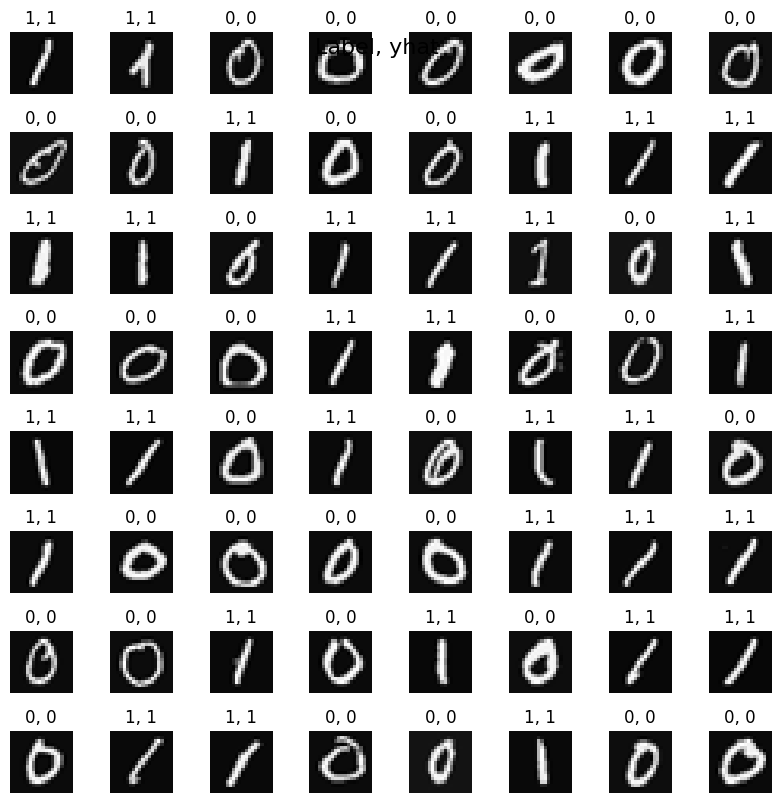

In [18]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m,n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i, ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    X_random_index_reshaped = X[random_index].reshape((20,20)).T
    ax.imshow(X_random_index_reshaped, cmap='gray')

    prediction = model.predict(X[random_index].reshape(1,400))

    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0
    
    ax.set_title(f"{y[random_index,0]}, {yhat}")
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=16)
plt.show()

# NumPy Model Implementation

In [22]:
def sigmoid(z):
    """"
    Compute the sigmoid of z

    Parameters:
    z : array_like -> A scalar or numpy array of any size

    Returns:
    g : array_like -> sigmoid(z)
    """

    z = np.clip(z, -500, 500) # protect against overflow -> np.clip: limit the values in an array
    g = 1.0/(1.0 + np.exp(-z))

    return g

In [24]:
def my_dense(a_in, W, b, g):
    """
    Computes dense layer
    Args:
        a_in (ndarray (n,)) :    Data, 1 example
        W (ndarray (n,j))   :    Weight matrix, n features per unit, j units
        b (ndarray (j,))    :    bias vector, j units
        g activation function (e.g. sigmoid, relu,...)
    Returns
        a_out (ndarray (j,)) :  j units
    """

    units = W.shape[1]
    a_out = np.zeros(units)

    for j in range(units):
        w = W[:,j]
        z = np.dot(a_in, w) + b[j]
        a_out[j] = g(z)
    
    return a_out

In [25]:
#Check
X_tst = 0.1*np.arange(1,3,1).reshape(2,)  # (1 example, 2 features)
W_tst = 0.1*np.arange(1,7,1).reshape(2,3) # (2 inputsm 3 outputs features)
b_tst = 0.1*np.arange(1,4,1).reshape(3,)  # (3 features)
A_tst = my_dense(X_tst, W_tst, b_tst, sigmoid)
print(A_tst)

[0.54735762 0.57932425 0.61063923]
